<a href="https://colab.research.google.com/github/Chetanshere/MYproj/blob/main/Stock_Market_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stock Market Prediction Using LSTM

---


Chetan Rangrao Shere, Tybsc(Math's)

Tabish Rafiuddin Patel, Tybsc(Math's) 

**B K Birla College of Arts, Science and Commerce , Kalyan**

# Collecting The Data 

In [ ]:
import pandas_datareader as pdr
key="69b12a5c3f120c655f1fd0c47b6dd2e702d69cdd"

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-02-20 00:00:00+00:00,171.85,174.26,171.42,172.05,33531012,40.901605,41.475203,40.799262,40.949206,134124048,0.0,1.0
1,AAPL,2018-02-21 00:00:00+00:00,171.07,174.12,171.01,172.83,35833514,40.715959,41.441882,40.701678,41.134852,143334056,0.0,1.0
2,AAPL,2018-02-22 00:00:00+00:00,172.50,173.95,171.71,171.80,30504116,41.056310,41.401421,40.868284,40.889704,122016464,0.0,1.0
3,AAPL,2018-02-23 00:00:00+00:00,175.50,175.65,173.54,173.67,33329232,41.770333,41.806034,41.303838,41.334779,133316928,0.0,1.0
4,AAPL,2018-02-26 00:00:00+00:00,178.97,179.39,176.21,176.35,36886432,42.596219,42.696182,41.939318,41.972639,147545728,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-02-09 00:00:00+00:00,150.87,154.3300,150.42,153.775,56007143,150.640563,154.095301,150.191247,153.541145,56007143,0.00,1.0
1253,AAPL,2023-02-10 00:00:00+00:00,151.01,151.3401,149.22,149.460,57450708,151.010000,151.340100,149.220000,149.460000,57450708,0.23,1.0
1254,AAPL,2023-02-13 00:00:00+00:00,153.85,154.2600,150.92,150.952,62199013,153.850000,154.260000,150.920000,150.952000,62199013,0.00,1.0
1255,AAPL,2023-02-14 00:00:00+00:00,153.20,153.7700,150.86,152.120,61707573,153.200000,153.770000,150.860000,152.120000,61707573,0.00,1.0
1256,AAPL,2023-02-15 00:00:00+00:00,155.33,155.5000,152.88,153.110,65669252,155.330000,155.500000,152.880000,153.110000,65669252,0.00,1.0


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0       171.85
1       171.07
2       172.50
3       175.50
4       178.97
         ...  
1252    150.87
1253    151.01
1254    153.85
1255    153.20
1256    155.33
Name: close, Length: 1257, dtype: float64

# Data Pre-Processing

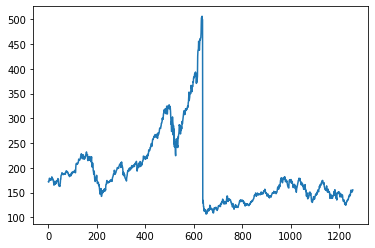

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
df1

0       171.85
1       171.07
2       172.50
3       175.50
4       178.97
         ...  
1252    150.87
1253    151.01
1254    153.85
1255    153.20
1256    155.33
Name: close, Length: 1257, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.16283031]
 [0.16087664]
 [0.16445836]
 ...
 [0.11774577]
 [0.11611772]
 [0.12145272]]


In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 440)

In [ ]:
train_data

array([[1.62830307e-01],
       [1.60876644e-01],
       [1.64458359e-01],
       [1.71972448e-01],
       [1.80663745e-01],
       [1.79211021e-01],
       [1.78534753e-01],
       [1.70720100e-01],
       [1.73750783e-01],
       [1.75278647e-01],
       [1.74902943e-01],
       [1.70795241e-01],
       [1.75579211e-01],
       [1.83193488e-01],
       [1.87551659e-01],
       [1.83168441e-01],
       [1.79336255e-01],
       [1.79862242e-01],
       [1.78284283e-01],
       [1.71471509e-01],
       [1.71321227e-01],
       [1.61377583e-01],
       [1.55316218e-01],
       [1.45522855e-01],
       [1.65134627e-01],
       [1.54038823e-01],
       [1.49380088e-01],
       [1.52636193e-01],
       [1.49881027e-01],
       [1.54164058e-01],
       [1.62229180e-01],
       [1.65209768e-01],
       [1.54139011e-01],
       [1.58321853e-01],
       [1.66336882e-01],
       [1.64308078e-01],
       [1.68566061e-01],
       [1.70043832e-01],
       [1.72773951e-01],
       [1.78835316e-01],


In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# LSTM Model Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 373ms/step - loss: 0.0424 - val_loss: 0.0022
Epoch 2/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0190 - val_loss: 0.0065
Epoch 3/100
12/12 [==============================] - 4s 364ms/step - loss: 0.0131 - val_loss: 5.5427e-04
Epoch 4/100
12/12 [==============================] - 3s 269ms/step - loss: 0.0091 - val_loss: 0.0012
Epoch 5/100
12/12 [==============================] - 3s 275ms/step - loss: 0.0098 - val_loss: 5.0563e-04
Epoch 6/100
12/12 [==============================] - 3s 241ms/step - loss: 0.0084 - val_loss: 3.8394e-04
Epoch 7/100
12/12 [==============================] - 4s 352ms/step - loss: 0.0075 - val_loss: 3.3332e-04
Epoch 8/100
12/12 [==============================] - 3s 266ms/step - loss: 0.0070 - val_loss: 6.2461e-04
Epoch 9/100
12/12 [==============================] - 3s 252ms/step - loss: 0.0064 - val_loss: 5.2383e-04
Epoch 10/100
12/12 [==============================] - 3s 271ms/ste

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.11.0'

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 58ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

230.1902111368919

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

153.4991461375539

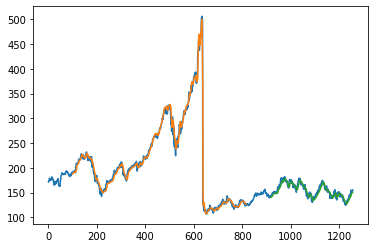

In [ ]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.10917971195992482,
 0.11003130870381966,
 0.11251095804633682,
 0.10770194113963677,
 0.08926737633061982,
 0.07854727614276763,
 0.08919223544145266,
 0.09833437695679392,
 0.09908578584846583,
 0.09665623043206006,
 0.08328115216030052,
 0.08410770194113959,
 0.08050093926111451,
 0.07889793362554787,
 0.09054477144646211,
 0.07899812147777074,
 0.08909204758922978,
 0.0924483406386975,
 0.09272385723231058,
 0.09154664996869122,
 0.1012648716343143,
 0.10672510958046327,
 0.11396368190356915,
 0.10647463994990602,
 0.09507827175954914,
 0.1224796493425172,
 0.11646837820914213,
 0.10973074514715087,
 0.0956543519098309,
 0.08025046963055726,
 0.07899812147777074,
 0.08035065748278014,
 0.08180338134001247,
 0.07020663744520972,
 0.10026299311208514,
 0.10735128365685653,
 0.103794614902943,
 0.10820288040075132,
 0.10507201001878513,
 0.10990607388854096,
 0.11133375078271751,
 0.10311834690043825,
 0.10855353788353161,
 0.11078271759549146,
 0.10336881653099561,
 0.0936255479023

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)        

[0.11044103]
101
1 day input [0.11003131 0.11251096 0.10770194 0.08926738 0.07854728 0.08919224
 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094
 0.07889793 0.09054477 0.07899812 0.08909205 0.09244834 0.09272386
 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464 0.09507827
 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047 0.07899812
 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461
 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835 0.10855354
 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844 0.10386976
 0.10261741 0.09966187 0.0903444  0.08541014 0.08969317 0.08846587
 0.09430182 0.09675642 0.0910958  0.07428929 0.06930495 0.0639449
 0.06376957 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017
 0.05703193 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698
 0.05838447 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666
 0.07105823 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446
 0.09297433 0.09790858 0.09056982 

# Predicting The Stock Movement For Next 30 Days

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1257

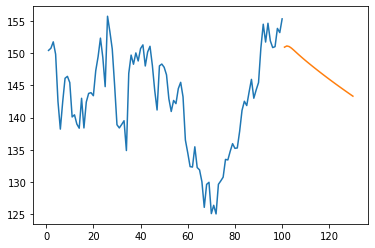

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

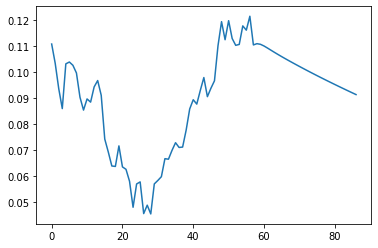

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

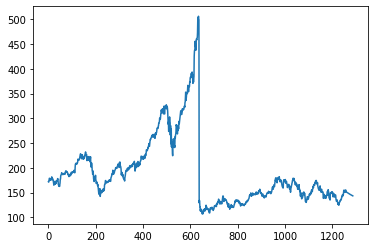

In [ ]:
plt.plot(df3)